# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df = pd.read_csv('../data/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
corrMatrix = df.corr()

corrMatrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
stats = df.describe().T
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


<AxesSubplot:>

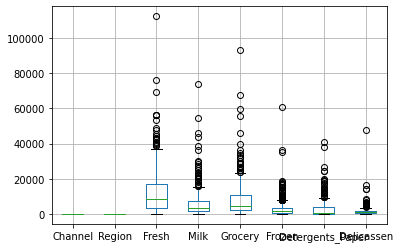

In [8]:
cols=df.columns
df.boxplot(column=list(cols))

In [ ]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [9]:
# Your code here
df_out = df[((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].index
df.drop(df_out,inplace=True)

<AxesSubplot:>

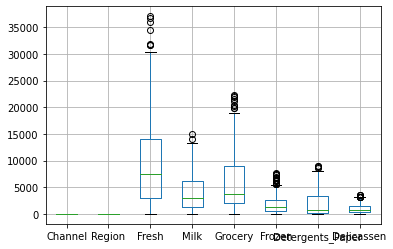

In [10]:
# Your comment here
df.boxplot(column=list(cols))

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [11]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler=StandardScaler()

df_scale = scaler.fit_transform(df)



# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [12]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(df_scale)
df['labels'] = kmeans.labels_

df[df['labels']==4].describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
count,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,1.0,2.615385,25171.153846,4481.923077,5707.230769,2264.538462,617.769231,1903.769231,4.0
std,0.0,0.697247,7343.946572,3013.987962,3454.601075,1715.977814,665.143191,1043.956294,0.0
min,1.0,1.000000,12356.000000,1222.000000,1447.000000,127.000000,10.000000,3.000000,4.0
25%,1.0,2.250000,19605.250000,2427.000000,3179.000000,807.500000,184.500000,1246.750000,4.0
50%,1.0,3.000000,26188.500000,3679.500000,5140.000000,2243.500000,367.000000,1839.000000,4.0
75%,1.0,3.000000,29705.500000,5723.500000,7320.750000,3343.750000,792.500000,2753.250000,4.0
max,1.0,3.000000,37036.000000,13252.000000,16966.000000,6130.000000,2575.000000,3628.000000,4.0


Count the values in `labels`.

In [13]:
# Your code here:
df['labels'].value_counts(normalize=False)


2    100
1     50
3     43
6     42
0     35
4     26
5     21
7     15
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [14]:
# Your code here
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(eps=0.5).fit(df_scale)
df['labels_DBSCAN'] = model_dbscan.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,-1
5,2,3,9413,8259,5126,666,1795,1451,0,-1
6,2,3,12126,3199,6975,480,3140,545,5,-1


Count the values in `labels_DBSCAN`.

In [15]:
# Your code here
df['labels_DBSCAN'].value_counts()

-1    308
 0     24
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

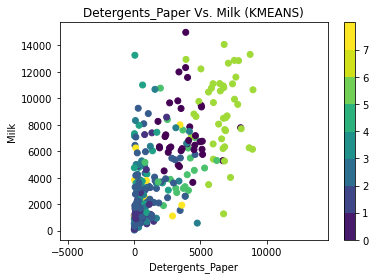

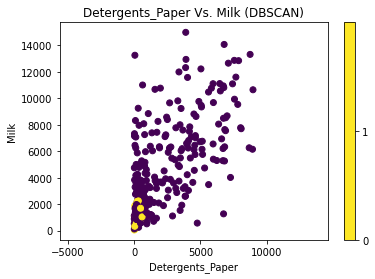

In [16]:
# Your code here:
labels = df['labels']
labels_DBSCAN = df['labels_DBSCAN']

plt.scatter(df['Detergents_Paper'], df['Milk'], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.colorbar(boundaries=np.arange(len(np.unique(labels))+1)).set_ticks(np.arange(len(np.unique(labels))))
plt.title('Detergents_Paper Vs. Milk (KMEANS)')
plt.show()
plt.scatter(df['Detergents_Paper'], df['Milk'], c=labels_DBSCAN)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('Detergents_Paper Vs. Milk (DBSCAN)')
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

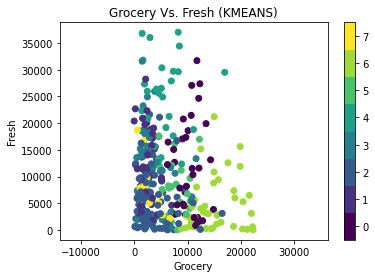

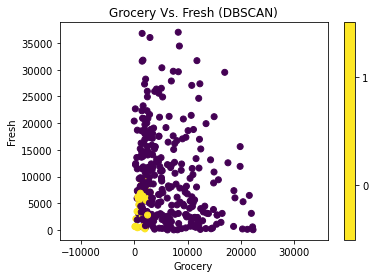

In [17]:
# Your code here:
plt.scatter(df['Grocery'], df['Fresh'], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.colorbar(boundaries=np.arange(len(np.unique(labels))+1)-0.5).set_ticks(np.arange(len(np.unique(labels))))
plt.title('Grocery Vs. Fresh (KMEANS)')
plt.show()
plt.scatter(df['Grocery'], df['Fresh'], c=labels_DBSCAN)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)-0.5).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('Grocery Vs. Fresh (DBSCAN)')
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

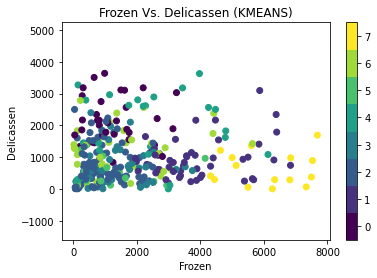

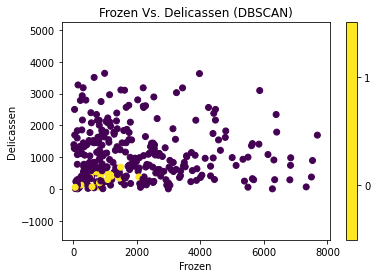

In [18]:
# Your code here:

plt.scatter(df['Frozen'], df['Delicassen'], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.colorbar(boundaries=np.arange(len(np.unique(labels))+1)-0.5).set_ticks(np.arange(len(np.unique(labels))))
plt.title('Frozen Vs. Delicassen (KMEANS)')
plt.show()
plt.scatter(df['Frozen'], df['Delicassen'], c=labels_DBSCAN)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.colorbar(boundaries=np.arange(len(np.unique(labels_DBSCAN))+1)-0.5).set_ticks(np.arange(len(np.unique(labels_DBSCAN))))
plt.title('Frozen Vs. Delicassen (DBSCAN)')
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [19]:
# Your code here:
df.groupby(['labels', 'labels_DBSCAN']).mean()

Channel    Region         Fresh         Milk  \
labels labels_DBSCAN                                                  
0      -1             1.971429  2.857143  11972.371429  7479.057143   
1      -1             1.000000  2.880000  11770.660000  1927.280000   
2      -1             1.000000  2.934211   6442.973684  2933.157895   
        0             1.000000  3.000000   4344.625000  1124.333333   
3      -1             1.000000  1.116279  10191.372093  2805.279070   
4      -1             1.000000  2.615385  25171.153846  4481.923077   
5      -1             2.000000  2.714286   8225.523810  4684.857143   
6      -1             1.928571  2.571429   4637.666667  9000.642857   
7      -1             1.066667  1.533333   7202.400000  2754.600000   

                           Grocery       Frozen  Detergents_Paper   Delicassen  
labels labels_DBSCAN                                                            
0      -1             10005.228571  1266.028571       3853.314286  2157.428571  
1      -1              2381.880000  3824.260000        471.600000   937.980000  
2      -1              3875.328947   926.802632        890.118421   812.736842  
        0              1411.875000   846.875000        230.666667   329.125000  
3      -1              3467.186047  1428.581395        870.720930   752.093023  
4      -1              5707.230769  2264.538462        617.769231  1903.769231  
5      -1              7814.761905  1135.904762       3388.238095   413.333333  
6      -1             15177.357143  1360.095238       6659.285714  1077.761905  
7      -1              3598.733333  6064.066667        960.200000   643.466667

Which algorithm appears to perform better?

In [ ]:
# Your observations here


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here